In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
#Load data
from google.colab import drive

drive.mount('/content/gdrive')
directory= '/content/gdrive/MyDrive/survey lung cancer.csv'
cg = pd.read_csv(directory)
cg.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
cg.colums = ["GENDER","LUNG_CANCER","AGE","SMOKING","YELLOW_FINGERS","ANXIETY","PEER_PRESSURE","CHRONIC DISEASE","WHEEZING","ALCOHOL CONSUMING",
             "COUGHING","SHORTNESS OF BREATH","SWALLOWING DIFFICULTY","CHEST PAIN"]

<ipython-input-5-aa8515b40567>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cg.colums = ["GENDER","LUNG_CANCER","AGE","SMOKING","YELLOW_FINGERS","ANXIETY","PEER_PRESSURE","CHRONIC DISEASE","WHEEZING","ALCOHOL CONSUMING",


<function matplotlib.pyplot.show(close=None, block=None)>

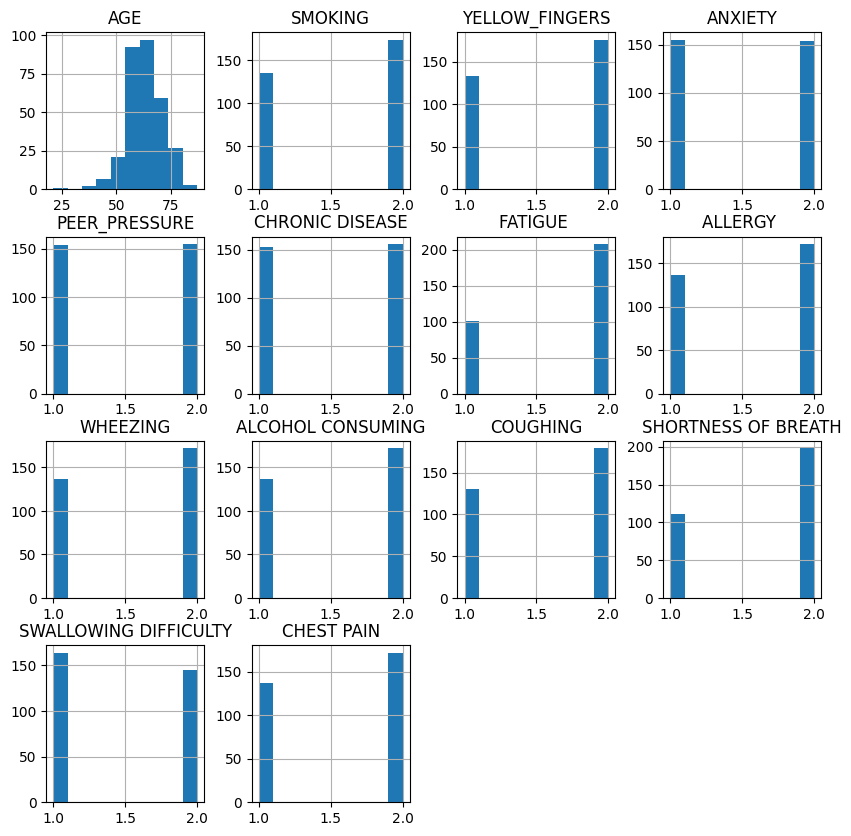

In [6]:
import matplotlib.pyplot as plt
#plots other feature sets
cg.hist(figsize = (10, 10))
plt.show

In [7]:
#transforming dataset with dummies variables to replace characters with bnary integers
cg["LUNG_CANCER"].replace(["NO","YES"],[0,1],inplace=True)
cg["GENDER"].replace(["F","M"],[0,1],inplace=True)

In [8]:
cg.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [9]:
#feature set
x = cg[["GENDER","AGE","SMOKING","YELLOW_FINGERS","ANXIETY","PEER_PRESSURE","CHRONIC DISEASE","WHEEZING","ALCOHOL CONSUMING","COUGHING","SHORTNESS OF BREATH",
        "SWALLOWING DIFFICULTY","CHEST PAIN"]]

In [10]:
#label set
y = cg["LUNG_CANCER"]

In [11]:
#train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (216, 13)
Number transactions y_train dataset:  (216,)
Number transactions x_test dataset:  (93, 13)
Number transactions y_test dataset:  (93,)


In [12]:
#Train model
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [13]:
#Test model
y_pred = model.predict(x_test)
print('Accuracy:',accuracy_score(y_test, y_pred))

Accuracy: 0.9247311827956989
